In [1]:
import pandas as pd
import sklearn as sk
import numpy as np

In [30]:
projects = pd.read_csv("projects.csv")
outcomes = pd.read_csv("outcomes.csv")

In [31]:
outcomes = outcomes.set_index("projectid")
outcomes = outcomes["fully_funded"].to_frame()

outcomes['fully_funded'] = outcomes['fully_funded'].map({'t': int(1), 'f': int(0)})
outcomes['fully_funded'] = outcomes['fully_funded'].astype(int)

In [32]:
projects = projects.set_index("projectid")
projects = projects["total_price_excluding_optional_support"].to_frame()

In [33]:
merged = pd.merge(projects, outcomes, on='projectid', how='left')

In [34]:
pd.isna(merged).sum()

,0
total_price_excluding_optional_support,0
fully_funded,44772


In [35]:
merged = merged.dropna()

In [36]:
merged = merged.sort_values(by="total_price_excluding_optional_support", ascending=False)

In [ ]:
len(merged)

209085

In [13]:
.3 * len(merged)

62725.5

In [14]:
projects.iloc[62725]

,2a5f97af7977587d866dd8ad645325a2
total_price_excluding_optional_support,824.03


In [37]:
# projects greater than $824 won't get funded
merged["fully_funded_pred"] = 0

In [29]:
funded = merged["total_price_excluding_optional_support"] < 824

In [38]:
merged["fully_funded_pred"][merged["total_price_excluding_optional_support"] < 824] = 1

<ipython-input-38-8ae1961795bb>:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  merged["fully_funded_pred"][merged["total_price_excluding_optional_support"] < 824] = 1
<ipython-input-38-8ae1961795bb>:1: SettingWithCopyWarning: 
A value is t

In [24]:
merged.sort_values(by="total_price_excluding_optional_support").head(5)

,total_price_excluding_optional_support,fully_funded,fully_funded_pred
projectid,,,
0b18714d4cdd7ada3850a29f9d6f848d,1.0,1,1
23eb5052760b4f27bf3e4b876d0624d2,1.0,1,1
d6f0cd2135ad3010063e60fa992073e3,1.0,1,1
864e6dca26ab76539eaaeb3b630bd7db,1.0,1,1
7940c403f1d836889aa7a3afda9e5389,1.0,1,1


In [39]:
merged['fully_funded'] = merged['fully_funded'].astype(int)

In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, PrecisionRecallDisplay, roc_curve, auc, RocCurveDisplay

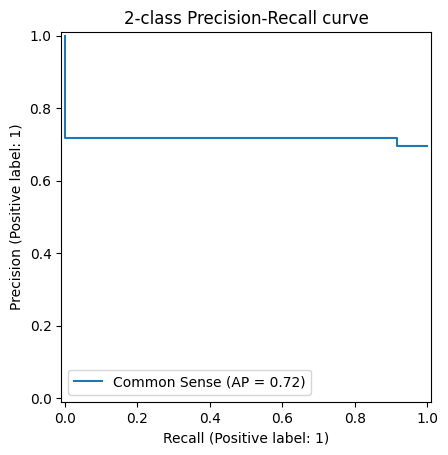

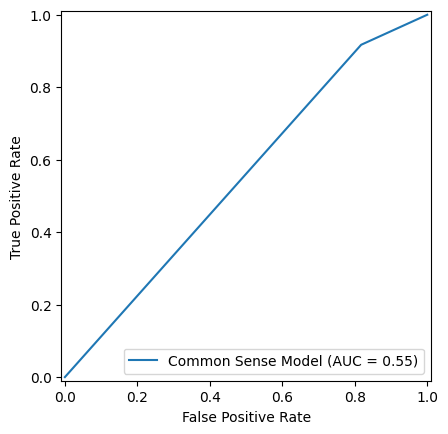

In [41]:
y_test = merged['fully_funded']
y_pred = merged['fully_funded_pred']

pr_display = PrecisionRecallDisplay.from_predictions(
    y_test, y_pred, name="Common Sense"
)

pr_display.ax_.set_title("2-class Precision-Recall curve")

pr_display.figure_.savefig('rf_precision_recall.jpg')

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                            estimator_name='Common Sense Model')
roc_display.plot().figure_.savefig('rf_roc.jpg')

In [42]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

precision = precision_score(y_test, y_pred)
print("Precision:", precision)

recall = recall_score(y_test, y_pred)
print("Recall:", recall)

Accuracy: 0.6933375960318152
Precision: 0.7191814618105943
Recall: 0.9171269820262234
